In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [4]:
df = pd.read_csv("/content/sample_data/en_Omniscient Reader_episode_total.csv")

In [5]:
df

,Unnamed: 0,Episode,Date,Review
0,0,1,"Aug 19, 2020",This art is HONESTLY SPECTACULAR. Can't WAIT t...
1,1,1,"Aug 19, 2020",IT'S HERE!!!
2,2,1,"Aug 19, 2020","If he read the story over ten years, I hope he..."
3,3,1,"Aug 19, 2020",Yo this better become the next big action fant...
4,4,1,"Aug 19, 2020","DONT SLEEP ON THIS, THIS IS A TOP TIER MANHWA"
...,...,...,...,...
159346,159346,99,"May 11, 2022",I fcking hate Junghyeok here so freaking much....
159347,159347,99,"May 9, 2022",Lol so he's acting to show her that he cares a...
159348,159348,99,"May 12, 2022",can i give spoiler he is gonna come back to li...
159349,159349,99,"Apr 9, 2022",this was the most disappointing use of coins y...


In [6]:
# 하나의 스트링
df['Review'].values
doc = ''.join(df['Review'].values)
DATA_PATH = './'
# 텍스트 파일로 임시 저장
filepath = "Omniscient Reader (Review).txt"
f = open(DATA_PATH + filepath, 'w')
f.write(doc)
f.close()

In [7]:
# 다시 읽어보기
filepath = "Omniscient Reader (Review).txt"
f = open(DATA_PATH + filepath, 'r')
review = f.read()
f.close()
print(review[:1000])

This art is HONESTLY SPECTACULAR. Can't WAIT to see where this one goes!!IT'S HERE!!!If he read the story over ten years, I hope he still remembers the early stuff 😳Yo this better become the next big action fantasy series that’s on WEBTOON in multiple languages that everyone is reading.DONT SLEEP ON THIS, THIS IS A TOP TIER MANHWAi would read a 3,000 episode webtoon....just me okay :( edit: omg i just noticed that it was a web novel thanks to everyone for telling me.This is one of the most popular korean webtoons! And one of the most legendary web novels!!! Everyone you will love this. I’m a simple woman. I saw a hot guy on the ad. Here I am. Um if I finish this is it gonna happen in real life too? 0-0Reminds me of Solo-Leveling!!Big rip for reapers scansthe author of the web novel: *laughs in omnipotence*f for reaperscansOMG ITS ON WEBTOONS!!! This is one of the best WEBTOONS I've read! This is a good read if you like Solo Leveling! ♥️♥️♥️I read this on another site and just after a f

In [8]:
def convert_to_lower(doc):
    # I'm 만 제외하고 
    return doc.capitalize() # doc.lower()

review = convert_to_lower(review)
print(review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
def remove_punctuation(doc):
    import re
    
    # 구두점 제거 
    s = re.sub(r'[.,"\'-?:!;\n\t\r]', '', doc)
    
    # 괄호 제거    
    pattern = r'\([^)]*\)'  # ()   \(   [^)]*   \)  
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\[[^]]*\]'  # []   \[   [^)]*  \]
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\<[^>]*\>'  # <>   \<   [^)]*   \>
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\{[^}]*\}'  # {}   \{   [^)]*   \}
    s = re.sub(pattern=pattern, repl='', string=s)
  
    return s

review = remove_punctuation(review)
print(review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 5.2 MB/s 


In [11]:
from soynlp.normalizer import *

In [12]:
def remove_repeat_characters(doc):
    import soynlp.normalizer
    
    s = soynlp.normalizer. repeat_normalize(doc, num_repeats=2)
    return s
review = remove_repeat_characters(review)
print(review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
def clean_other_languages(doc):
    result = doc.encode('utf-8').decode('ascii', 'ignore') 
    return result

review = clean_other_languages(review)
print(review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
def remove_stopwords(doc):
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize 

    stop_words = set(stopwords.words('english')) 
    stop_words.update(['im','dont','way','gon','man','someone'])
    word_tokens = word_tokenize(doc)

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w)
    return result

review = remove_stopwords(review)
print(review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
review

['This',
 'art',
 'honestly',
 'spectacular',
 'cant',
 'wait',
 'see',
 'one',
 'goesits',
 'hereif',
 'read',
 'story',
 'ten',
 'years',
 'hope',
 'still',
 'remembers',
 'early',
 'stuff',
 'yo',
 'better',
 'become',
 'next',
 'big',
 'action',
 'fantasy',
 'series',
 'thats',
 'webtoon',
 'multiple',
 'languages',
 'everyone',
 'readingdont',
 'sleep',
 'top',
 'tier',
 'manhwai',
 'would',
 'read',
 'episode',
 'webtoonjust',
 'okay',
 'edit',
 'omg',
 'noticed',
 'web',
 'novel',
 'thanks',
 'everyone',
 'telling',
 'methis',
 'one',
 'popular',
 'korean',
 'webtoons',
 'one',
 'legendary',
 'web',
 'novels',
 'everyone',
 'love',
 'simple',
 'woman',
 'saw',
 'hot',
 'guy',
 'ad',
 'um',
 'finish',
 'na',
 'happen',
 'real',
 'life',
 'reminds',
 'sololevelingbig',
 'rip',
 'reapers',
 'scansthe',
 'author',
 'web',
 'novel',
 'laughs',
 'omnipotencef',
 'reaperscansomg',
 'webtoons',
 'one',
 'best',
 'webtoons',
 'ive',
 'read',
 'good',
 'read',
 'like',
 'solo',
 'leveling

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
from nltk.tag import pos_tag

tagged_list = pos_tag(review)
tagged_list

[('This', 'DT'),
 ('art', 'NN'),
 ('honestly', 'RB'),
 ('spectacular', 'JJ'),
 ('cant', 'JJ'),
 ('wait', 'NN'),
 ('see', 'VBP'),
 ('one', 'CD'),
 ('goesits', 'NNS'),
 ('hereif', 'VBP'),
 ('read', 'JJ'),
 ('story', 'NN'),
 ('ten', 'CD'),
 ('years', 'NNS'),
 ('hope', 'VBP'),
 ('still', 'RB'),
 ('remembers', 'NNS'),
 ('early', 'RB'),
 ('stuff', 'VBP'),
 ('yo', 'RB'),
 ('better', 'RB'),
 ('become', 'VBN'),
 ('next', 'JJ'),
 ('big', 'JJ'),
 ('action', 'NN'),
 ('fantasy', 'NN'),
 ('series', 'NN'),
 ('thats', 'NNS'),
 ('webtoon', 'VBP'),
 ('multiple', 'JJ'),
 ('languages', 'NNS'),
 ('everyone', 'NN'),
 ('readingdont', 'JJ'),
 ('sleep', 'JJ'),
 ('top', 'NN'),
 ('tier', 'NN'),
 ('manhwai', 'NN'),
 ('would', 'MD'),
 ('read', 'VB'),
 ('episode', 'VB'),
 ('webtoonjust', 'JJ'),
 ('okay', 'NN'),
 ('edit', 'NN'),
 ('omg', 'NN'),
 ('noticed', 'VBD'),
 ('web', 'JJ'),
 ('novel', 'JJ'),
 ('thanks', 'NNS'),
 ('everyone', 'NN'),
 ('telling', 'VBG'),
 ('methis', 'CC'),
 ('one', 'CD'),
 ('popular', 'JJ'),
 (

In [23]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['art',
 'wait',
 'story',
 'action',
 'fantasy',
 'series',
 'everyone',
 'top',
 'tier',
 'manhwai',
 'okay',
 'edit',
 'omg',
 'everyone',
 'web',
 'everyone',
 'woman',
 'guy',
 'ad',
 'life',
 'rip',
 'author',
 'web',
 'reaperscansomg',
 'leveling',
 'site',
 'read',
 'story',
 'disappoint',
 'time',
 'math',
 'episode',
 'turn',
 'trust',
 'novel',
 'cliffhanger',
 'episode',
 'novel',
 'send',
 'link',
 'section',
 'id',
 'link',
 'webtoon',
 'novel',
 'phew',
 'goodwhos',
 'reaper',
 'scanswho',
 'wait',
 'episode',
 'pretty',
 'prologue',
 'mc',
 'half',
 'year',
 'youre',
 'guy',
 'day',
 'didnt',
 'episode',
 'day',
 'rookie',
 'thing',
 'feel',
 'itthe',
 'notification',
 'belirve',
 'webtoonam',
 'feel',
 'solo',
 'solo',
 'leveling',
 'artist',
 'solo',
 'levelingas',
 'person',
 'webtoon',
 'week',
 'webtoon',
 'webtoon',
 'opinion',
 'solo',
 'levellingim',
 'leveling',
 'reader',
 'omniscient',
 'reader',
 'bit',
 'earlybecause',
 'pronunciation',
 'kimdokja',
 'tripl

In [24]:
type(nouns_list)

list

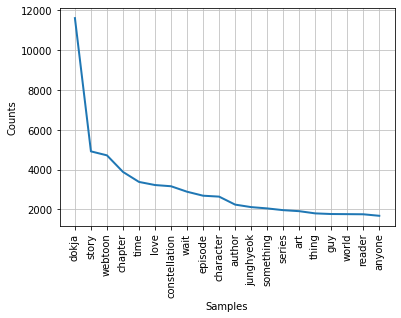

In [25]:
from nltk import Text

text = Text(nouns_list)

text.plot(20)
plt.show()

In [26]:
text.concordance("dokja")

Displaying 25 of 11606 matches:
nhwa cant help miss yu junghyeok kim dokja tandem fast miss feel story tier won
edhe piecenot webtoon world wahh kim dokja web novel version story solo drew so
y solo drew solo vibes wait leveling dokja op protagonist yeahh please ps solo 
bnovel reading story reader dang kim dokja waist jealousas time treat dedicatio
y wait dokjas companys web novel fun dokja handsome protagonist storyim name pr
st storyim name prevent look webtoon dokja qwq likey thisi vibesi webtoon ive b
order frame panel grl time dude love dokja heewon junghyeoki favorite manhwanov
 storyok math day series wait k love dokja kim swearaa webtoon webtoon wish pri
 day proud webtoon cant help feeling dokja anything appearance look story mc ch
anning series guess regressor figure dokja stress series aaahhh series muchdokj
rety read handful dramas orv webtoon dokja han sooyoungim kim dokja supremacy a
orv webtoon dokja han sooyoungim kim dokja supremacy art beautifulfor read ride
his stor

In [27]:
#similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.
text.similar("dokja")

story chapter webtoon time character junghyeok love constellation
author wait episode something thing reader kim series person novel
world see


In [28]:
# 빈도 탐색
cnt = Counter(text)
vocab_sorted = sorted(cnt.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted[:20])

[('dokja', 11606), ('story', 4913), ('webtoon', 4713), ('chapter', 3881), ('time', 3378), ('love', 3222), ('constellation', 3161), ('wait', 2886), ('episode', 2686), ('character', 2640), ('author', 2239), ('junghyeok', 2113), ('something', 2048), ('series', 1960), ('art', 1909), ('thing', 1798), ('guy', 1766), ('world', 1760), ('reader', 1753), ('anyone', 1677)]


In [29]:
import nltk

In [30]:
word_frequency = nltk.FreqDist(text) # 단어 빈도 계산

# {단어(key): 수(value)} -> 데이터프레임
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

df

,0
art,1909
wait,2886
story,4913
action,368
fantasy,84
...,...
nooyou,1
kakyoinjunghyeok,1
fasterwho,1
fillingjunghyeok,1


In [31]:
# 빈도 내림차순 정렬
result = df.sort_values([0], ascending=False)
head = result.head(20)

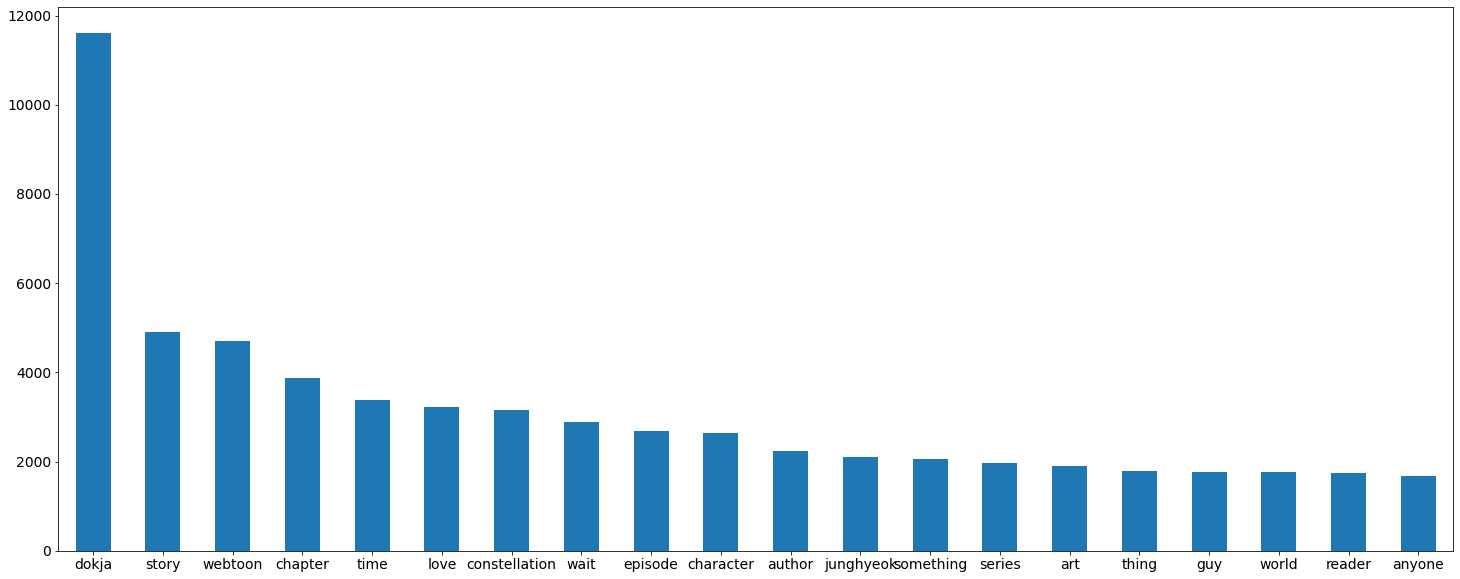

In [32]:

# matplot 그래프
head.plot(kind = 'bar', legend = False, figsize = (25,10), rot=0, fontsize=14) # 'bar' graph
plt.savefig('text_tokenized.png',dpi=200 ,facecolor='#eeeeee')
plt.show()


In [33]:
type(review)

list